### IDs:
Insert yours IDs to the cell below

ID #1: 313288284

ID #2: 205570989


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [141]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from IPython.display import Math, Latex
from scipy.stats import nbinom
from scipy.stats import binom
import scipy.stats
import math

In [142]:
from sklearn.datasets import load_boston 
boston = load_boston()
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [143]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Section 1

In [175]:

s=df_boston.shape # so number of samples is 506 and number of features 14
d=df_boston.dtypes # data type for each variable
print(s)
print(d)
df_boston.describe()

(506, 15)
CRIM         float64
ZN           float64
INDUS        float64
CHAS         float64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD          float64
TAX          float64
PTRATIO      float64
B            float64
LSTAT        float64
target       float64
Nox_bins    category
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Section 2

We can how nitric oxides concentration distrbution reminds log normal disrbution with about 0.55 as the mean


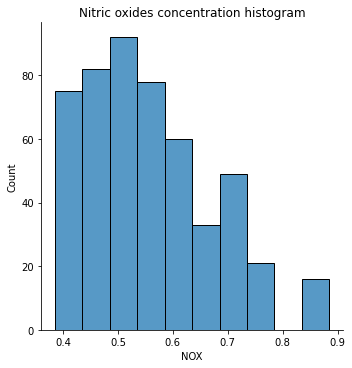

In [171]:

sns.displot(df_boston, x=df_boston["NOX"], binwidth= 0.05)
df1 = df_boston
plt.title('Nitric oxides concentration histogram')
print('We can how nitric oxides concentration distrbution reminds log normal disrbution with about 0.55 as the mean')

Section 3

We can see from the nitric oxides concentration boxplot distribution that with the lower value of nox the target price is higher and vice-versa we can see that in the most higher nox rate the std is smaller from the rest 


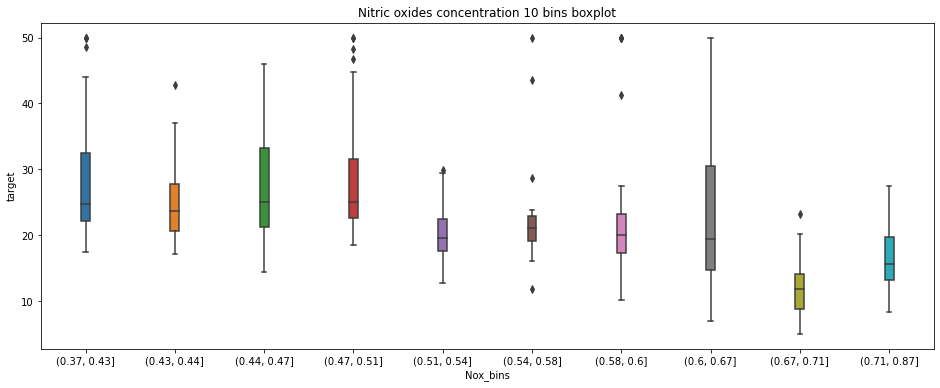

In [145]:

df1['Nox_bins'] = pd.qcut(df1['NOX'], q=10, precision=0)
plt.figure(figsize= (16,6))
rc=sns.boxplot(x="Nox_bins", y="target", data=df1, width = 0.1)
plt.title('Nitric oxides concentration 10 bins boxplot')
print('We can see from the nitric oxides concentration boxplot distribution that with the lower value of nox the target price is higher and vice-versa we can see that in the most higher nox rate the std is smaller from the rest ')


Section 4

In [176]:

corrM = df_boston.corr()
print('There many correlted features')


There many correlted features


one feature with unusual behavior is the CHAS which is relatively uncorrelated with any other feature besides the target


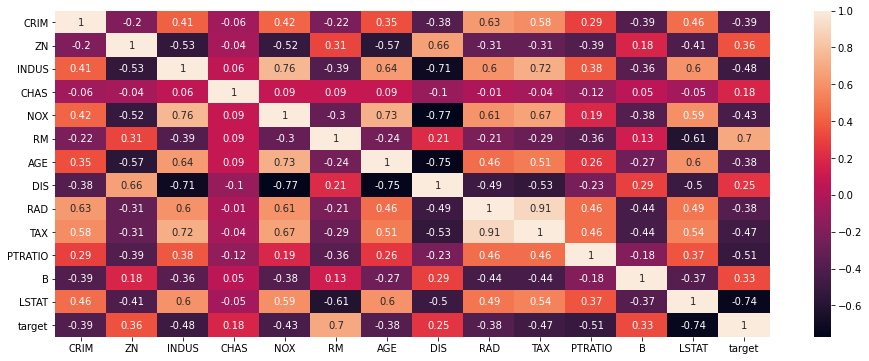

In [147]:
print('one feature with unusual behavior is the CHAS which is relatively uncorrelated with any other feature besides the target')
corrM = corrM.round(2)
plt.figure(figsize= (16,6))
sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns, annot = True)

In [148]:
corrM = corrM.replace(1,0)
corrM.describe()
## RAD +TAX
## NOX + DIS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.107143,-0.126429,0.121429,0.010000,0.118571,-0.084286,0.102143,-0.217857,0.165714,0.165000,0.044286,-0.132143,0.069286,-0.140000
std,0.379867,0.382313,0.528595,0.085575,0.525208,0.343482,0.479474,0.447182,0.476715,0.510742,0.340401,0.284988,0.508262,0.432684
min,-0.390000,-0.570000,-0.710000,-0.120000,-0.770000,-0.610000,-0.750000,-0.770000,-0.490000,-0.530000,-0.510000,-0.440000,-0.740000,-0.740000
25%,-0.215000,-0.405000,-0.382500,-0.047500,-0.360000,-0.297500,-0.262500,-0.522500,-0.285000,-0.305000,-0.217500,-0.377500,-0.400000,-0.460000
50%,0.145000,-0.255000,0.220000,-0.005000,0.140000,-0.215000,0.175000,-0.305000,0.230000,0.230000,0.095000,-0.225000,0.185000,-0.380000
75%,0.417500,0.135000,0.600000,0.082500,0.605000,0.120000,0.497500,0.157500,0.572500,0.570000,0.350000,0.110000,0.527500,0.232500
max,0.630000,0.660000,0.760000,0.180000,0.760000,0.700000,0.730000,0.660000,0.910000,0.910000,0.460000,0.330000,0.600000,0.700000


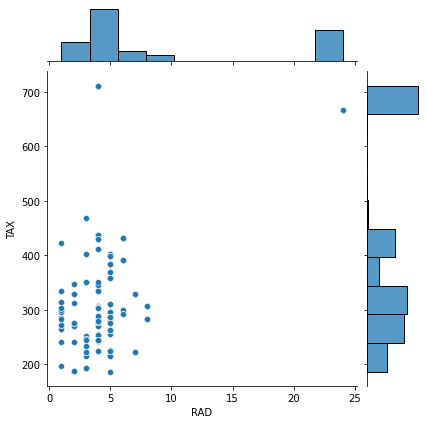

In [149]:
sns.jointplot(data = df_boston, x="RAD", y="TAX")

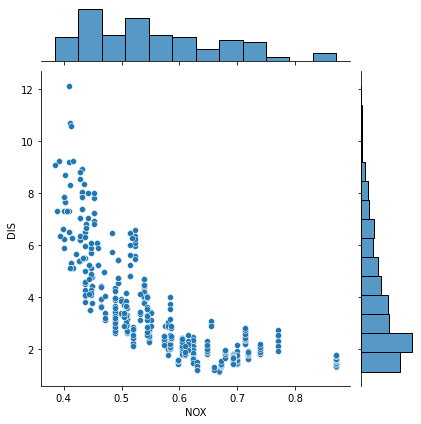

In [150]:
sns.jointplot(data = df_boston , x = "NOX", y="DIS")

Section 5

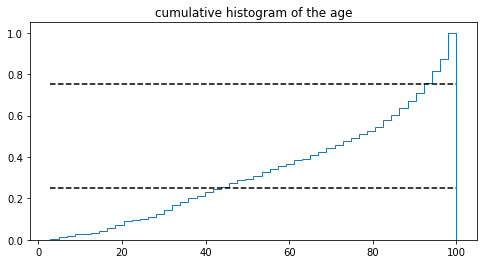

In [152]:
fig, ax = plt.subplots(figsize=(8, 4))
n_bins = 50 
y_1q= [0.75]*(n_bins+ 1)
y_3q = [0.25]*(n_bins+1)
plt.title('cumulative histogram of the age')
n, bins, patches = ax.hist(df_boston['AGE'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
ax.plot(bins, y_1q, 'k--', linewidth=1.5, label='third quartile first')
ax.plot(bins, y_3q, 'k--', linewidth=1.5, label='third quartile')

Section 6

In [179]:
corrM.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.178963,-0.055854,0.193333,0.081414,0.190798,-0.013762,0.173833,-0.146527,0.235854,0.236150,0.116925,-0.060569,0.141277,-0.068390
std,0.445117,0.487876,0.577203,0.277651,0.573518,0.449620,0.534476,0.552479,0.523372,0.554964,0.425154,0.415799,0.565327,0.528348
min,-0.388305,-0.569537,-0.708027,-0.121515,-0.769230,-0.613808,-0.747881,-0.769230,-0.494588,-0.534432,-0.507787,-0.444413,-0.737663,-0.737663
25%,-0.214552,-0.407666,-0.383001,-0.051121,-0.360585,-0.299653,-0.265217,-0.525073,-0.286423,-0.308934,-0.218699,-0.376560,-0.401268,-0.458232
50%,0.321340,-0.256209,0.394915,0.020710,0.304952,-0.214547,0.307125,-0.306070,0.460382,0.483654,0.225224,-0.225459,0.414833,-0.379290
75%,0.446959,0.277873,0.634534,0.090032,0.653878,0.185952,0.578368,0.238758,0.607363,0.646708,0.380947,0.163657,0.579158,0.312578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that are property-tax rate of 450 per $10,000 and than a big gap far to 670 property-tax rate per $10,000 and the higher tax is mainly to lower target points


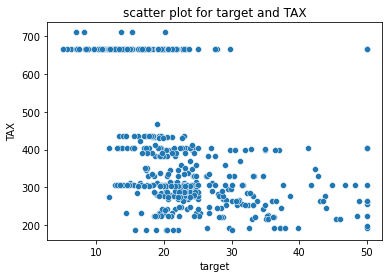

In [154]:
plt.title('scatter plot for target and TAX')
sns.scatterplot(data = df_boston , x = "target", y="TAX")
print('We can see that are property-tax rate of 450 per $10,000 and than a big gap far to 670 property-tax rate per $10,000 and the higher tax is mainly to lower target points')

We can see that the correltion between RAD and TAX is 0.9, which shows that higher tax payers get a better accessibility to radial highways


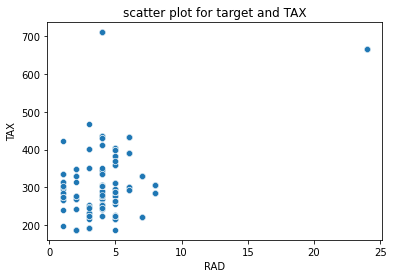

In [155]:
plt.title('scatter plot for target and TAX')
sns.scatterplot(data = df_boston , x = "RAD", y="TAX")
print("We can see that the correltion between RAD and TAX is 0.9, which shows that higher tax payers get a better accessibility to radial highways")

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.


No, will show it by proof. The density function for three dimensional multivariate gaussian looks like :
$$fX(x1,x2,x3)=\frac{1}{\sqrt[]{(2π)^3|Σ|}}*exp(-\frac{1}{2}(X_i−μ_i)^T Σ^{-1}(X_i−μ_i))$$   

The COV between every two different variables will be 0 (pairwise-independent) 
$$\sum = 
\begin{pmatrix}
σ^2_1 & 0 & 0 \\
0 & σ^2_2 & 0 \\
0 & 0 & σ^2_3
\end{pmatrix}$$

In addtion the columns vectors are: 

$$X = 
\begin{pmatrix}
x_{1}  \\
x_{2}  \\
x_{3}  
\end{pmatrix}$$

$$ µ = 
\begin{pmatrix}
µ_{1}  \\
µ_{2}  \\
µ_{3}  
\end{pmatrix}$$

From simple placement we get :

$$fX(x1,x2,x3)=\frac{1}{\sqrt[]{(2π)^3σ^2_1σ^2_2σ^2_3}}*exp(-\frac{1}{2}\frac{(x_{1}−µ_{1})^2)}{σ^2_i}+\frac{(x_{2}−µ_{2})^2)}{σ^2_2}+\frac{(x_{3}−µ_{3})^2)}{σ^2_3}) $$



                                           
 f(x) is multivariate gaussian there for 
 $$f(x_1),f(x_2),f(x_3)$$ 
 Are gaussian distributions and we can use :
    
 $$f(x_i)=\frac{1}{\sqrt[]{(2π)^3σ^2_i}}*exp(-\frac{1}{2}\frac{(x_{i}−µ_{i})^2)}{σ^2_i}) $$      
    

Which means that from :
$$f(x_1)*f(x_2)*f(x_3)$$ 

we get the same result :
    
$$=\frac{1}{\sqrt[]{(2π)^3σ^2_1σ^2_2σ^2_3}}*exp(-\frac{1}{2}\frac{(x_{1}−µ_{1})^2)}{σ^2_i}+\frac{(x_{2}−µ_{2})^2)}{σ^2_2}+\frac{(x_{3}−µ_{3})^2)}{σ^2_3}) $$

in conclusion the density indeed factorizes and we have mutually independent gaussians
$$f(x_1)*f(x_2)*f(x_3)=fX(x1,x2,x3)$$ 
                                           

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?


$$n*m*k$$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

$$n+m+k$$

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$$(k*(m-1))+(k*(m-1))+(k-1)$$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

X and Y conditionally independent given Z if:
$$P(X = a, Y = b|Z = c) = P(X = a|Z = c)P(Y = b|Z = c)$$

An example where 𝑋  and 𝑌 are conditionaly independent given 𝑍:

In the biased coin example where we have two coins with probabilities n and m of obtaining Heads, and we randomly choose one of them (denote the choice by X) and
flip it twice to obtain Y1, Y2, then Y1, Y2 are conditionally independent given X.  Y1, Y2 are
not independent if p  is not equal to q.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [156]:
GMD = pd.read_csv(r"C:\Users\יונתן דרפל\Desktop\לימודים\תואר שני -דאטה סינאס\סטטיסטיקה וניתוח נתונים\שיעורי בית\HW2\GMD_2021.csv", header = None)
GMD.columns =['Num', 'value'] 
GMD

,Num,value
0,0,3.575253
1,1,4.105491
2,2,3.903642
3,3,4.472249
4,4,4.297265
...,...,...
795,795,16.596823
796,796,16.314496
797,797,14.690099
798,798,12.942772


#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

One way using EM:

In [180]:
import numpy as np
b = GMD['value'].values.reshape(len(GMD['value']),1)
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(b)
print(gm.means_)
print(gm.weights_)



[[ 8.99843174]
 [15.10399633]
 [ 4.08381061]]
[0.25020291 0.62479709 0.125     ]


Secound way using scatter plot (manual clustering due to small and clear dataset):

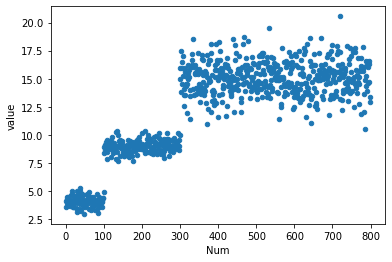

In [158]:
above_300 = GMD[GMD['Num'] > 299]
ax = GMD.plot.scatter(0,1)
ax 

In [185]:
#Estimasions by graf
#Given data:
k=3
# dis 1 
w_1=100/800 #(=0.125)
mu_1 = 4    #given
sigma_1=0.5   #given
# dis 2
w_2=0.25  #given
mu_2 =9    #given
sigma_2=0.5  #given

# dis 3  
w_3=500/800  # (=0.625) --> from the scatter plot we can see that third distribution clearly is between 300-800
mu_3= above_300.mean()   #(averge of 300-800)
sigma_2=1.5
print(w_1)
print(w_3)
print(mu_3) # (=~15)

0.125
0.625
Num      549.500000
value     15.103044
dtype: float64


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 we choose the limit as the min and the max of the values in the distrbution


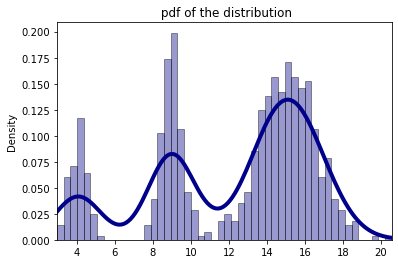

In [186]:
a = sns.distplot(b, hist=True, kde=True, 
             bins=int(50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
a.set(xlim=(b.min(),b.max()))
plt.title(' pdf of the distribution')

print(" we choose the limit as the min and the max of the values in the distrbution")

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

1 - Generate 3 equal-sized normal distributions with mean and sigma requested using numpy.random.normal

2 - Add to a list 2 value for each distrbution each of them with 1 q form her mean  


#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [1]:
l1 = np.random.normal(loc= 7 , scale=1, size=333)
l2 = np.random.normal(loc= 12, scale=1, size=333)
l3 = np.random.normal(loc= 23, scale=1, size=334)
l_l = np.concatenate((l1,l2,l3))
sns.displot(l_l)
plt.title('The 1000 points hist')

NameError: name 'sns' is not defined

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


23.0

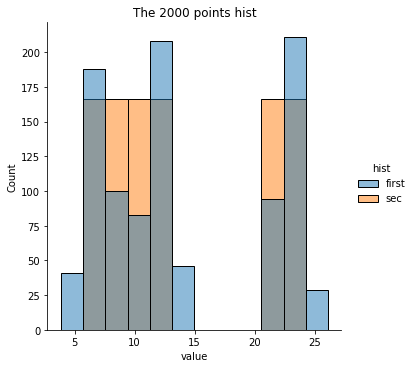

In [188]:
t1, t2, t3 = [], [], []
n = 333//2
for i in range (n):
    t1.append(6)
    t1.append(8)
    t2.append(11)
    t2.append(13)
    t3.append(22)
    t3.append(24)
t_t = np.concatenate((t1,t2,t3))

df = pd.DataFrame()
df['value'] = np.concatenate((l_l,t_t))
first_hist = ['first'] *1000
s_hist = ['sec'] * 996
df['hist'] = first_hist +s_hist
sns.displot(df, x= "value", hue='hist', common_norm=False)
plt.title('The 2000 points hist')

np.mean(t3)

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

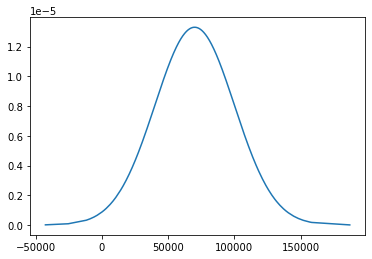

In [189]:
#annual salaries of employees
mu=70000
sigma =30000
s = np.random.normal(mu, sigma, 1000)
s.sort()
smean = np.mean(s)
sstd = np.std(s)
pdf = stats.norm.pdf(s, mu, sigma)
plt.plot(s, pdf) # including h here is crucial

#### 4.A
What percent of people earn less than 50,000 RCU?

In [190]:
value_1=norm.cdf(50000,mu,sigma)
value_1

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [191]:
value_2 = norm.cdf(65000,mu,sigma)-norm.cdf(45000,mu,sigma)
value_2

0.23148778642545326

#### 4.C
What percent of people earn more than 70,000 RCU?

In [192]:
value_3 = 1-norm.cdf(70000,mu,sigma)
value_3

0.5

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [163]:
value_4 = (1-norm.cdf(140000,mu,sigma))*1000
round(value_4)

10.0

#### 4.E
<span style="color:red"> This question was slightly updated due to a subtlety in the phrasing </span>

A survey is performed on employees of the company. **20 groups of 50 employees each are sampled (with replacenets).**
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?


In [164]:
sd_new = 30000 / np.sqrt(50)
p = scipy.stats.norm.cdf(70000, 70000, sd_new) - scipy.stats.norm.cdf(50000, 70000, sd_new)
1 - binom.cdf(10, 20, p)




0.411897195116123

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [165]:
def e_T(n):
    total = 1
    for i in range (2,n+1):
        total += 1/i
    return n*total
e_T(20)

71.95479314287364

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [168]:
def var_T(N):
    sum = 0
    for i in range(1,N+1):
        p = (N-i+1)/N
        sum = sum+ scipy.stats.geom.var(p)
    return sum
var_T(20)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:360: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:361: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


566.5105044223355

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [169]:
def p_greater(n_suc,n_try):
    p = (n_suc - np.arange(n_suc)) / n_suc
    try_v = np.arange(n_try) + 1
    p1 = scipy.stats.geom.pmf(try_v, p[0])
    
    for i in p[1:]:
        p_i = scipy.stats.geom.pmf(try_v, i)
        p1 = np.convolve(p1, p_i)
    return 1 - p1[:n_try+1-n_suc].sum()

print((p_greater(20,40)))

0.9641122736925725


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [170]:
n,x = 20, 40
var = var_T(n)
sd = np.sqrt(var)
e_x = e_T(n)
b = (x - e_x) / sd 
print(1 - (1 / b**2))

0.44520064682904903


We can see that Chebicheff bound is a general  bound but not so precis